In [1]:
import pandas as pd
import numpy as np

seed = 1234

In [2]:
df = pd.read_csv('MSCallGraph_0.csv')
df = df.drop(['Unnamed: 0','traceid','timestamp','rpcid','interface','rt',],axis=1)
df = df.replace('(?)', np.NaN)
df = df.replace('', np.NaN)
df = df.replace('NAN', np.NaN)
df = df.dropna()
df = df.drop_duplicates()

In [3]:
df

,um,rpctype,dm
0,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
11,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,fd6d86bd0fd550e717c1fdb82a33190a9fef216d87d535...
20,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,userDefined,5cca70246befb1f4c9546d2912b9419dee54439218efa5...
26,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...
42,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,01d660afcfadafd587e20ec4c04ddbc7eb0de95643ba0e...
...,...,...,...
6081607,0674d4c8b48f44a836019adff9dffe0cce2ee6e7b93ee0...,db,039ff41dc3636105ffd26b0ec675eec246a965e8102c77...
6081615,1cf86b19c487cc10ea3bb9623a319454029e040d0f4e9d...,db,bb61ac88608568ac2017c8559c1da973f4f94c7d1a958e...
6081625,2c52c868f36f3920d201fddda80c8062998ebc07ee2b85...,db,abb42d7303a4376befc681f9b4a765c6b6575de0df98ed...
6081642,1cf86b19c487cc10ea3bb9623a319454029e040d0f4e9d...,db,b0748973546ca26a9cbfe7802e52924291a76929a704a4...


In [4]:
triplets = []
entities = set()
relations = set()
for i in range(len(df)):
    head = df.iloc[i]['dm']
    tail = df.iloc[i]['um']
    rel = df.iloc[i]['rpctype']
    entities.add(head)
    entities.add(tail)
    relations.add(rel)
    triplets.append([head,rel,tail])

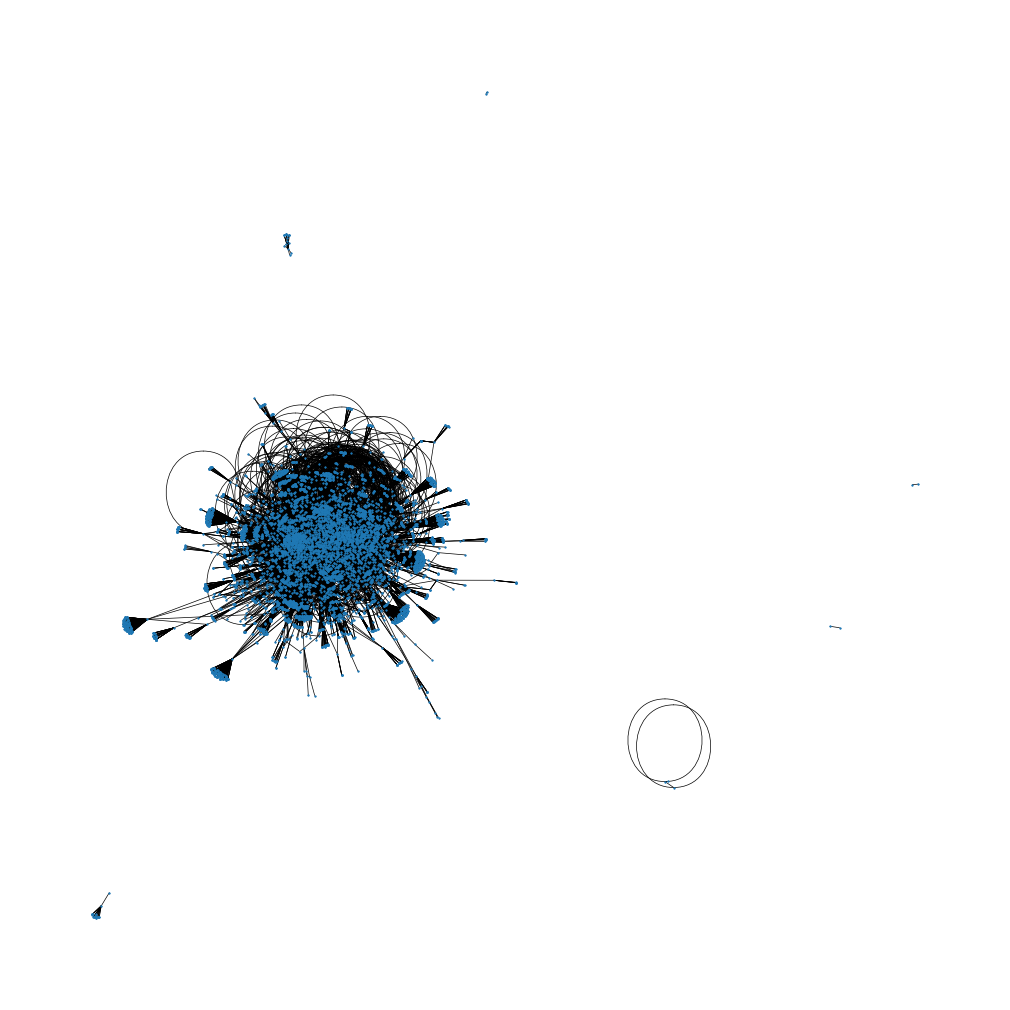

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

for entity in entities:
    G.add_node(entity)
for triplet in triplets:
    G.add_edge(triplet[0], triplet[2], label=triplet[1])

fig = plt.figure(1, figsize=(20, 20), dpi=50)

# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G, node_size = 5)

# Import matplotlib library to show the graph
plt.show()

In [6]:
import random


# shuffle the nodes randomly
nodes = list(G.nodes())
random.shuffle(nodes)

# split the nodes into two sets of approximately 64% and 36%
n = len(nodes)
m = int(n * 0.64)
nodes1 = set(nodes[:m])
nodes2 = set(nodes[m:])

# create subgraphs from the two sets of nodes
G1 = G.subgraph(nodes1)
G2 = G.subgraph(nodes2)

# print the sizes of the subgraphs
print(len(G1), len(G2))

4727 2659


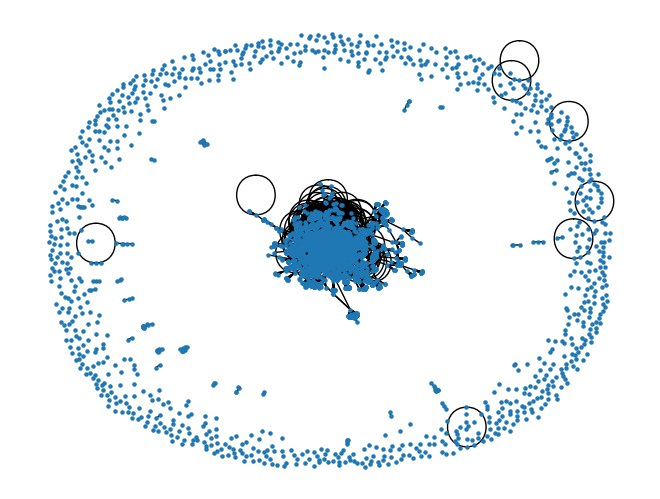

In [7]:
# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G1, node_size = 5)

# Import matplotlib library to show the graph
plt.show()

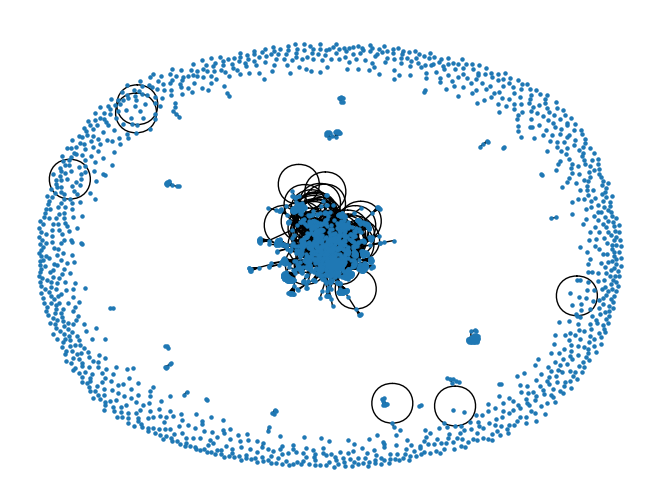

In [8]:
# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G2, node_size = 5)

# Import matplotlib library to show the graph
plt.show()

In [9]:
len(list(G1.edges(data=True)))

6547

In [10]:
len(list(G2.edges(data=True)))

2185

In [11]:
entities = list(set(df['dm']) | set(df['um']))
len(entities)

7386

In [12]:
relations = set(df['rpctype'])
len(relations)

6

In [25]:
G1_list = list(G1.nodes())
G2_list = list(G2.nodes())

Check that there are no overlapping nodes

In [26]:
assert len(set(G1_list) & set(G2_list)) == 0

In [27]:
transductive = df[(df['um'].isin(G1_list)) & (df['dm'].isin(G1_list))]
transductive

,um,rpctype,dm
20,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,userDefined,5cca70246befb1f4c9546d2912b9419dee54439218efa5...
278,95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772...,mc,0b0c981da8042a436f30f7d9f7cce74360abe630bd5478...
303,95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772...,rpc,95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772...
309,73eab0278dbf5ccb67f1c303b0770627c6223871c4874f...,mc,385d6716634806eae637933a023d11d211e465df6f43c8...
311,73eab0278dbf5ccb67f1c303b0770627c6223871c4874f...,rpc,73eab0278dbf5ccb67f1c303b0770627c6223871c4874f...
...,...,...,...
6068436,f2ff782d57371c090c294859e444ee4bdfb4b317e68368...,db,a2a5a9a0492f495f3dcc0bd933b0819cc8ac14289059d0...
6080476,9a0f0dd3e278f678cfa3f874a7c74af8206de653ec0396...,rpc,5ef671a7799d52d75c5c1b87d3542b5619c0ca7c9b3d80...
6081219,90c357ca77801f0d38c1f4cffa2e3d51ef7b1fca91ae35...,db,88c8713304cae7388c1703e83e1b0d3ec62dbdf33dd465...
6081607,0674d4c8b48f44a836019adff9dffe0cce2ee6e7b93ee0...,db,039ff41dc3636105ffd26b0ec675eec246a965e8102c77...


In [28]:
inductive = df[(df['um'].isin(G2_list)) & (df['dm'].isin(G2_list))]
inductive

,um,rpctype,dm
64,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
65,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,userDefined,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
66,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
89,4ab265f54516248ee8873be7d6441912456ce17e84f399...,rpc,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
92,4ab265f54516248ee8873be7d6441912456ce17e84f399...,http,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
...,...,...,...
6029456,87f3522e7b259f45398e495f02e0afd54d9bd8f77959c6...,db,a3abeae5d1f5887c300156d63029c8056193384d891f9f...
6067010,0be5b730b8229e496783019c9853654337e3d342ceb279...,rpc,f10612cc80a4777bcb0f9025041b3e4a9d8de8b20bfd2d...
6073688,5b563df180af0e674902ffbeddf022580eee216f0a172f...,db,1abd717ffef1e3721f131eb3b37fc5c84fb9c52d0a42f3...
6075331,de93367b32ae1873de4c22a944ed1c95cc7d8e082d1ae0...,db,5e8bce4e95a156333480c160ca5240190fce1eaaf77b13...


Check that the remaining values are correct

In [29]:
assert len(transductive) == len(pd.merge(transductive,df))

In [30]:
assert len(inductive) == len(pd.merge(inductive,df))

In [31]:
train_df = transductive
train_df

,um,rpctype,dm
20,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,userDefined,5cca70246befb1f4c9546d2912b9419dee54439218efa5...
278,95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772...,mc,0b0c981da8042a436f30f7d9f7cce74360abe630bd5478...
303,95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772...,rpc,95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772...
309,73eab0278dbf5ccb67f1c303b0770627c6223871c4874f...,mc,385d6716634806eae637933a023d11d211e465df6f43c8...
311,73eab0278dbf5ccb67f1c303b0770627c6223871c4874f...,rpc,73eab0278dbf5ccb67f1c303b0770627c6223871c4874f...
...,...,...,...
6068436,f2ff782d57371c090c294859e444ee4bdfb4b317e68368...,db,a2a5a9a0492f495f3dcc0bd933b0819cc8ac14289059d0...
6080476,9a0f0dd3e278f678cfa3f874a7c74af8206de653ec0396...,rpc,5ef671a7799d52d75c5c1b87d3542b5619c0ca7c9b3d80...
6081219,90c357ca77801f0d38c1f4cffa2e3d51ef7b1fca91ae35...,db,88c8713304cae7388c1703e83e1b0d3ec62dbdf33dd465...
6081607,0674d4c8b48f44a836019adff9dffe0cce2ee6e7b93ee0...,db,039ff41dc3636105ffd26b0ec675eec246a965e8102c77...


In [33]:
len(set(inductive['dm']) | set(inductive['um']))

1490

In [34]:
inductive

,um,rpctype,dm
64,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
65,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,userDefined,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
66,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
89,4ab265f54516248ee8873be7d6441912456ce17e84f399...,rpc,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
92,4ab265f54516248ee8873be7d6441912456ce17e84f399...,http,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
...,...,...,...
6029456,87f3522e7b259f45398e495f02e0afd54d9bd8f77959c6...,db,a3abeae5d1f5887c300156d63029c8056193384d891f9f...
6067010,0be5b730b8229e496783019c9853654337e3d342ceb279...,rpc,f10612cc80a4777bcb0f9025041b3e4a9d8de8b20bfd2d...
6073688,5b563df180af0e674902ffbeddf022580eee216f0a172f...,db,1abd717ffef1e3721f131eb3b37fc5c84fb9c52d0a42f3...
6075331,de93367b32ae1873de4c22a944ed1c95cc7d8e082d1ae0...,db,5e8bce4e95a156333480c160ca5240190fce1eaaf77b13...


In [35]:
validation_df = inductive.sample(frac=0.44, random_state=seed)  # random sample
validation_df

,um,rpctype,dm
1758966,dccacd558ca56ae655fbfc8914f322b468f071db1fade7...,mc,58fdf9e273b344f8e1a2ece611b1a59bd087a7084bb427...
1301203,61907af770acd8c9bd15f09fa6836818d41fd772482066...,db,7f717b57647dcbfde3f998d0268584a90b6c40fdb1b01d...
857469,e73a78e65d895bab660feb22016fb1e2c8cc92085f7e42...,http,9a9e8613b6d7d1b573ba38dba19eec9c3cc460ab00cb49...
3446204,515691d0421dedd130a5d03dae7fe44b2167841d679502...,mq,bf4f503caf8d16daa2442ab99e89d3cc94e4932302bd72...
1120703,bd60497bdc74d1c37bed34adc5bf20df15b378dd863baf...,db,ba192af4b5a63338935780c3a744d17f32d88f505f99ee...
...,...,...,...
25456,5f36526ab6e8894ba29417177aa9d57e37078263bc5f78...,rpc,6fbcbf605f7ae59d3c7efd909466c05f0fb2388c14e109...
216202,a25db459a097f3b6aa173c3ed5dcd8377f2d342c591d6b...,rpc,f10612cc80a4777bcb0f9025041b3e4a9d8de8b20bfd2d...
155115,c133d5f7eb91a127d94757ce7915ee3bceba0a25e95146...,mq,6f639e16aba857462d1326154890989e23b4d326a5b0dd...
1202187,2bbca6dc6ba99115e631eba25efc62743aff6d9fe3fe3a...,http,9a9e8613b6d7d1b573ba38dba19eec9c3cc460ab00cb49...


In [36]:
test_df = inductive.drop(validation_df.index)  # drop the sampled rows to get the second DataFram
test_df

,um,rpctype,dm
65,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,userDefined,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
89,4ab265f54516248ee8873be7d6441912456ce17e84f399...,rpc,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
136,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,de6d543c40695b95f303d7134b72e73fffec5e582f919e...
167,e6c95bef37d936ebb375bf135ded88c96eb9257a1d3d9d...,rpc,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
168,4ab265f54516248ee8873be7d6441912456ce17e84f399...,rpc,e6c95bef37d936ebb375bf135ded88c96eb9257a1d3d9d...
...,...,...,...
5957301,2c52c868f36f3920d201fddda80c8062998ebc07ee2b85...,db,71edbda9836943361496512bfc52c93f3d0ebe1dfd7033...
6012709,3fe330d56063785ef529b4b45e1d02598fdd05301cdc89...,mc,8b822cd06217fd61030ea83cf2a2879919005599e5363b...
6067010,0be5b730b8229e496783019c9853654337e3d342ceb279...,rpc,f10612cc80a4777bcb0f9025041b3e4a9d8de8b20bfd2d...
6075331,de93367b32ae1873de4c22a944ed1c95cc7d8e082d1ae0...,db,5e8bce4e95a156333480c160ca5240190fce1eaaf77b13...


Check to see if there is test leakage

In [37]:
assert(len(pd.merge(train_df, validation_df))==0)

In [38]:
assert(len(pd.merge(test_df, validation_df))==0)

In [39]:
assert(len(pd.merge(train_df, test_df))==0)

In [40]:
assert(len(pd.merge(train_df, inductive))==0)

Check that all relations are present in the train set

In [41]:
assert(len(set(df['rpctype'])) == len(set(train_df['rpctype'])))

Check that there is no entities test leakage

In [42]:
train_entities = set(train_df['dm']) | set(train_df['um'])
assert(len(train_entities & (set(validation_df['dm']) | set(validation_df['um'])))==0)

In [43]:
assert(len(train_entities & (set(inductive['dm']) | set(inductive['um'])))==0)

In [44]:
assert(len(train_entities & (set(test_df['dm']) | set(test_df['um'])))==0)

In [45]:
test_df[(test_df['dm'].isin(train_entities)) | (test_df['um'].isin(train_entities))]

,um,rpctype,dm


In [46]:
inductive[(inductive['dm'].isin(train_entities)) | (inductive['um'].isin(train_entities))]

,um,rpctype,dm


In [47]:
def create_triplets(df):
    triplets = []
    for i in range(len(df)):
        head = df.iloc[i]['dm']
        tail = df.iloc[i]['um']
        rel = df.iloc[i]['rpctype']
        triplets.append([head,rel,tail])
    return triplets

In [48]:
import asposecells
import jpype
jpype.startJVM()

from asposecells.api import Workbook, FileFormatType

def create_tsv(triplets, file_name):


    # Create Workbook object.
    workbook = Workbook(FileFormatType.TSV)

    # Access the first worksheet of the workbook.
    worksheet = workbook.getWorksheets().get(0)

    # Get the desired cell(s) of the worksheet and input the value into the cell(s).


    i = 1
    for elem in triplets: 
        worksheet.getCells().get("A"+str(i)).putValue(elem[0])
        worksheet.getCells().get("B"+str(i)).putValue(elem[1])
        worksheet.getCells().get("C"+str(i)).putValue(elem[2])
        i+=1


    # Save the workbook as TSV file.
    workbook.save(file_name)


    file = open(file_name,'r')  
    lines = file.readlines()  
    file.close()
    file = open(file_name,'w')  
    lines = lines[:-1]
    file.writelines(lines)
    file.close()

In [49]:
datasets = [train_df, validation_df, test_df,inductive]
names = ["train", "validation","test","inference"]

In [50]:
for elem in zip(datasets,names):
    create_tsv(create_triplets(elem[0]),f"MSCallGraph_0_{elem[1]}_fully_inductive.tsv")
jpype.shutdownJVM()